In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import random as rnd
# from IPython.display import Markdown, display

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

## 1. Первичный отсмотр данных

In [520]:
students = pd.read_csv('stud_math.csv')
display(students.head(10))
display(students.info())
len(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

395

Всего 395 учеников  
30 колонок  
13 столбцов - числа  
17 столбцов - строки  
Колонка studytime, granular отсутсвует в описании датасета - удаляем её:

In [521]:
students.drop('studytime, granular', axis=1, inplace=True)

In [522]:
print(students.isna().sum())
print('Всего пустых значений: ', students.isna().sum().sum())

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64
Всего пустых значений:  558


## 2. Первичный анализ данных в столбцах

In [523]:
def first_analysis(col, boundaries=None):
    print('Столбец ', col)
    if students[col].dtypes == 'object':
#         students[col] = students[col].astype(str).apply(lambda x: None if x.strip() == ''
#                                                         else None if x.strip() == 'nan'
#                                                         else x)
        all_indexes = list(students[col].value_counts().index)
        students[col] = students[col].apply(lambda x: rnd.choice(all_indexes) if pd.isna(x) else x)
        print(students[col].value_counts())
        sns.countplot(students[col])
    else:
        fig, ax = plt.subplots()
        students[col].hist(ax=ax)
        students[col].describe()
        ax.set_xlabel(col)
        ax.set_ylabel("Частота (раз)")
        plt.show
        print('Медиана: ', students[col].median())
        print("Среднее: ", students[col].mean())
        print("\n")
        if boundaries is not None:
            outliers = students[
                ~students[col].between(boundaries[0], boundaries[1]) &
                pd.notnull(students[col])
            ]
            if outliers.shape[0] > 0:
                print("В столбце есть выборсы:")
                display(outliers)

Столбец  address
U    305
R     90
Name: address, dtype: int64


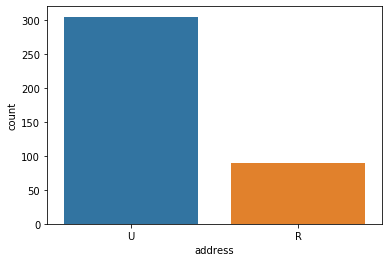

In [524]:
first_analysis('address')

Столбец  school
GP    349
MS     46
Name: school, dtype: int64


Index(['GP', 'MS'], dtype='object')

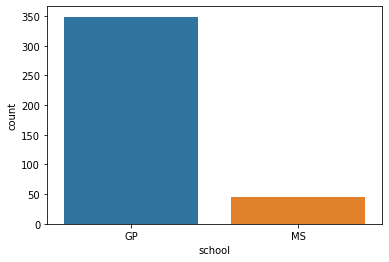

In [525]:
first_analysis('school')
students['school'].value_counts().index

Столбец  sex
F    208
M    187
Name: sex, dtype: int64


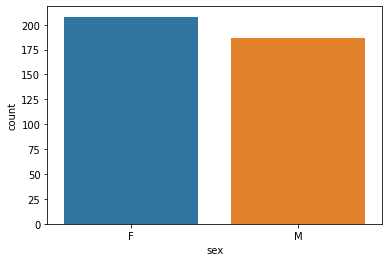

In [526]:
first_analysis('sex')

Столбец  age
Медиана:  17.0
Среднее:  16.696202531645568




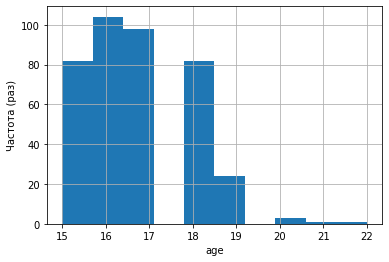

In [527]:
first_analysis('age', boundaries=(15, 22))

Столбец  address
U    305
R     90
Name: address, dtype: int64


['U', 'R']

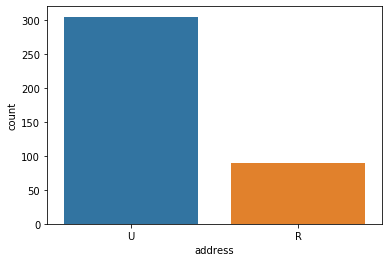

In [528]:
first_analysis('address')
all_indexes = list(students['address'].value_counts().index)
display(all_indexes)
# all_indexes.remove('None')


In [529]:
students['address'] = students['address'].apply(lambda x: rnd.choice(all_indexes) if x == 'None' else x)
display(students['address'].value_counts())

U    305
R     90
Name: address, dtype: int64

Столбец  famsize
GT3    277
LE3    118
Name: famsize, dtype: int64


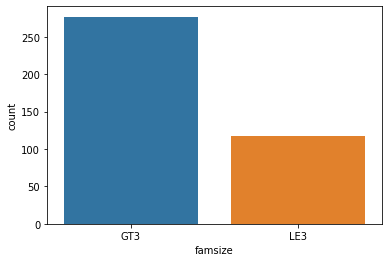

In [530]:
first_analysis('famsize')

Столбец  Pstatus
T    341
A     54
Name: Pstatus, dtype: int64


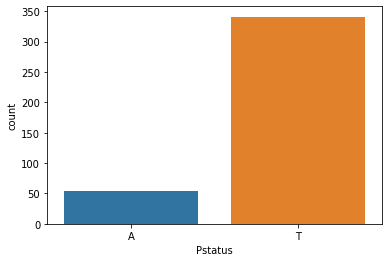

In [531]:
first_analysis('Pstatus')

Столбец  Medu
Медиана:  3.0
Среднее:  2.75




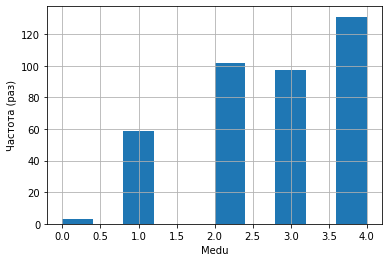

In [532]:
first_analysis('Medu', boundaries=(0, 4))


В столбце Medu есть три пустых значения. Заменим их на медиану 3

In [533]:
students['Medu'] = students['Medu'].apply(lambda x: 3 if pd.isna(x) else x)

Столбец  Fedu
Медиана:  2.0
Среднее:  2.61455525606469


В столбце есть выборсы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,A,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


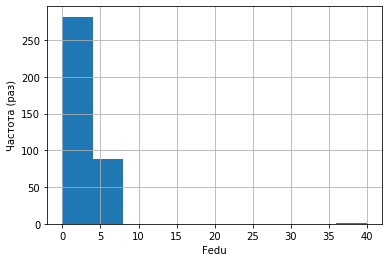

In [534]:
first_analysis('Fedu', boundaries=(0, 4))

В столбце Fedu ещё больше пустых значений и я заменю их на случайное чисор от 1 до 4 - это наиболее часто  
встречащиеся в распределении признака значения

In [535]:
students['Fedu'] = students['Fedu'].apply(lambda x: rnd.randint(1, 4) if pd.isna(x) else x)

Столбец  Mjob
other       135
services    100
teacher      65
at_home      60
health       35
Name: Mjob, dtype: int64


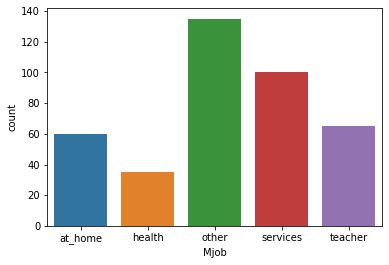

In [536]:
first_analysis('Mjob')

Столбец  Fjob
other       208
services    110
teacher      32
at_home      28
health       17
Name: Fjob, dtype: int64


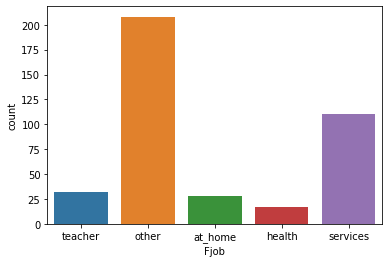

In [537]:
first_analysis('Fjob')

Столбец  reason
course        141
reputation    107
home          105
other          42
Name: reason, dtype: int64


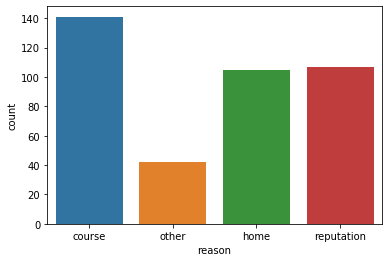

In [538]:
first_analysis('reason')

Столбец  guardian
mother    258
father     99
other      38
Name: guardian, dtype: int64


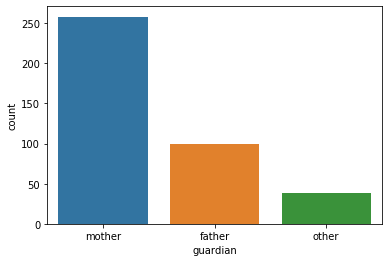

In [539]:
first_analysis('guardian')

Столбец  traveltime
Медиана:  1.0
Среднее:  1.438692098092643




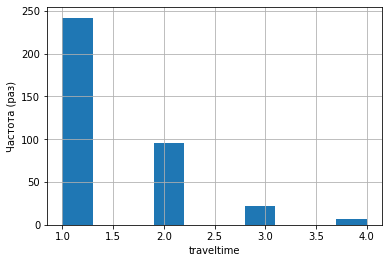

In [540]:
first_analysis('traveltime', boundaries=(1, 4))

Пустые значение в traveltime столбце можно заменить на случайные между 1 и 3

In [541]:
students['traveltime'] = students['traveltime'].apply(lambda x: rnd.randint(1, 3) if pd.isna(x) else x)

Столбец  studytime
Медиана:  2.0
Среднее:  2.038659793814433




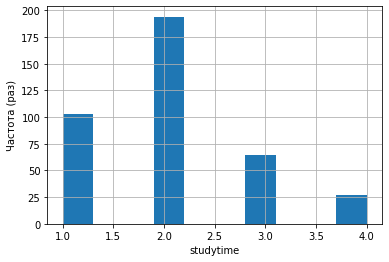

In [542]:
first_analysis('studytime', boundaries=(1, 4))

В признаке studytime нет ничтожно редко встречающихся признаков - поэтому пусть пустые значения меняются на любое из 4-х возможных

In [543]:
students['studytime'] = students['studytime'].apply(lambda x: rnd.randint(1, 4) if pd.isna(x) else x)

Столбец  failures
Медиана:  0.0
Среднее:  0.3378016085790885




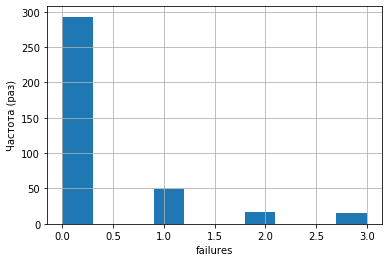

In [544]:
first_analysis('failures', boundaries=(0, 4))

У failures 2 и 3 встречаются совсем редко. Можно заменить всё на 0. Но я также оставлю 1, т.к. они встретились порядка 50 раз, что немало

In [545]:
students['failures'] = students['failures'].apply(lambda x: rnd.randint(0, 1) if pd.isna(x) else x)

Столбец  schoolsup
no     341
yes     54
Name: schoolsup, dtype: int64


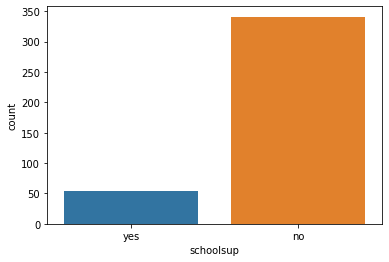

In [546]:
first_analysis('schoolsup')

Столбец  famsup
yes    245
no     150
Name: famsup, dtype: int64


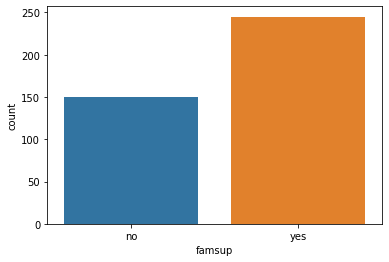

In [547]:
first_analysis('famsup')

Столбец  paid
no     220
yes    175
Name: paid, dtype: int64


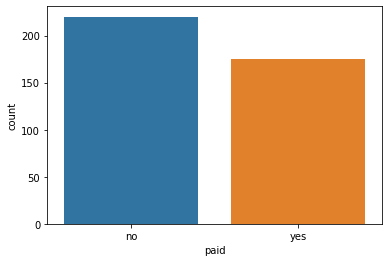

In [548]:
first_analysis('paid')

Столбец  activities
yes    200
no     195
Name: activities, dtype: int64


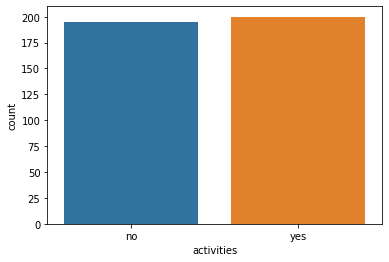

In [549]:
first_analysis('activities')

Столбец  nursery
yes    309
no      86
Name: nursery, dtype: int64


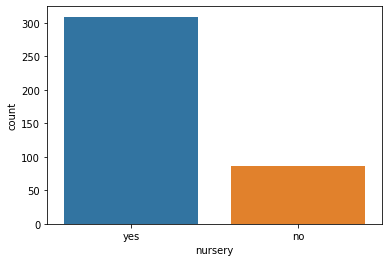

In [550]:
first_analysis('nursery')

Столбец  higher
yes    365
no      30
Name: higher, dtype: int64


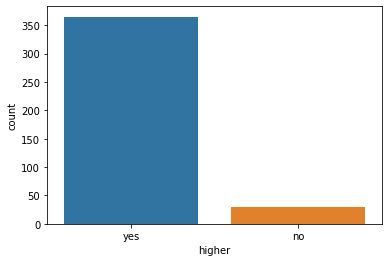

In [551]:
first_analysis('higher')

Столбец  internet
yes    320
no      75
Name: internet, dtype: int64


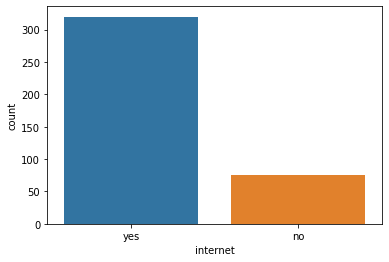

In [552]:
first_analysis('internet')

Столбец  romantic
no     257
yes    138
Name: romantic, dtype: int64


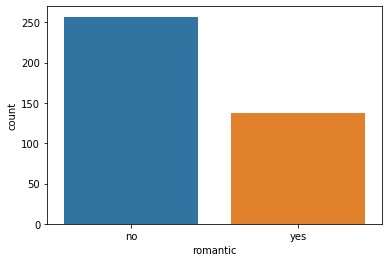

In [553]:
first_analysis('romantic')

Столбец  famrel
Медиана:  4.0
Среднее:  3.9375


В столбце есть выборсы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,A,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


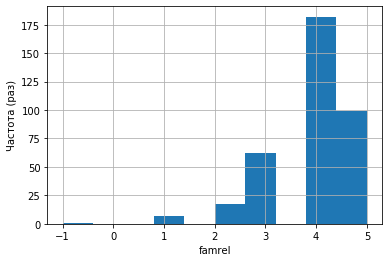

In [554]:
first_analysis('famrel', boundaries=(1, 5))

Основная часть значений переменной famrel лежит между 3 и 5 - ими и заполним пустые значения

In [555]:
students['famrel'] = students['famrel'].apply(lambda x: rnd.randint(3, 5) if pd.isna(x) else x)

Столбец  freetime
Медиана:  3.0
Среднее:  3.2317708333333335




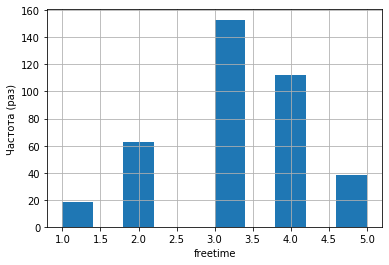

In [556]:
first_analysis('freetime', boundaries=(1, 5))

В столбце freetime есть 9 пустых значений, что не так много, и можно заменить пустоты на любой ищ возможных значений от 1 до 5

In [557]:
students['freetime'] = students['freetime'].apply(lambda x: rnd.randint(1, 5) if pd.isna(x) else x)

Столбец  goout
Медиана:  3.0
Среднее:  3.1059431524547803




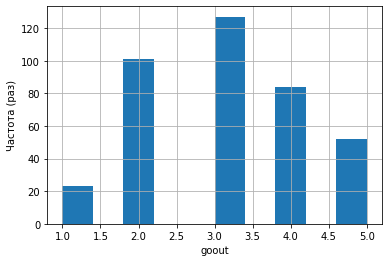

In [558]:
first_analysis('goout', boundaries=(1, 5))

С goout поступим также как с freetime

In [559]:
students['goout'] = students['goout'].apply(lambda x: rnd.randint(1, 5) if pd.isna(x) else x)

Столбец  health
Медиана:  4.0
Среднее:  3.531578947368421




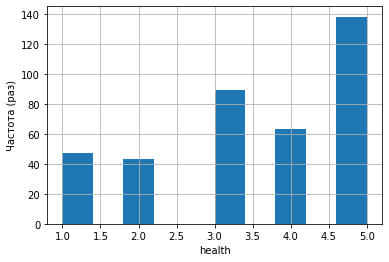

In [560]:
first_analysis('health', boundaries=(1, 5))

In [561]:
students['health'] = students['health'].apply(lambda x: rnd.randint(1, 5) if pd.isna(x) else x)

Столбец  absences
Медиана:  4.0
Среднее:  7.2793733681462145




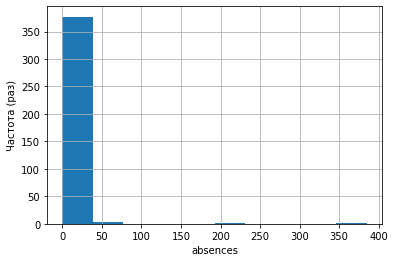

In [562]:
first_analysis('absences')

Кол-во пропущенных занятий уместно заменить просто на медиану

In [563]:
students['absences'] = students['absences'].apply(lambda x: 4 if pd.isna(x) else x)

Столбец  score
Медиана:  55.0
Среднее:  52.26221079691517




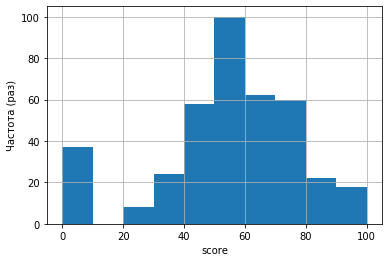

In [564]:
first_analysis('score', boundaries=(0, 100))

Заменить в score всё на медиану - выглядит адекватно

In [565]:
students['score'] = students['score'].apply(lambda x: 55 if pd.isna(x) else x)

**В столбцах Fedu и farmel есть выбросы. Заменим их на более логичные значения:**

Столбец  Fedu
Медиана:  2.0
Среднее:  2.518987341772152




2.0    111
3.0    100
4.0     97
1.0     85
0.0      2
Name: Fedu, dtype: int64

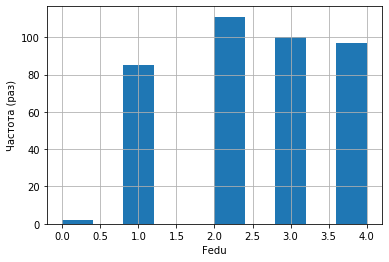

In [566]:
students['Fedu'] = students['Fedu'].apply(lambda x: 4 if x == 40 else x)
first_analysis('Fedu', boundaries=(0, 4))
display(students['Fedu'].value_counts())

Столбец  famrel
Медиана:  4.0
Среднее:  3.9417721518987343




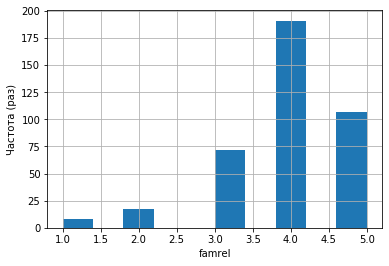

In [567]:
students['famrel'] = students['famrel'].apply(lambda x: 1 if x == -1 else x)
first_analysis('famrel', boundaries=(1, 5))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


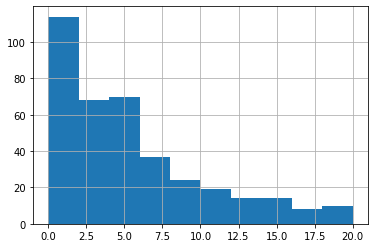

In [568]:
median = students.absences.median()
median
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist()

**Границы выбросов не могут быть отрицательными. Оставим только те данные, где прогулов от 0 до 20**

In [569]:
students = students[students['absences'].between(0, 20)|pd.isnull(students.absences)]
print('В выборке осталось учеников: ', len(students))

В выборке осталось учеников:  378


Также остались значения NaN, их мы не удаляли:

In [570]:
print('Медиана: ', students.absences.median())
print('Среднее: ', students.absences.mean())


Медиана:  4.0
Среднее:  4.584656084656085


Заменим значения NaN на медиану, т.к. она ближе к основной части значений, чем среднее

In [571]:
students['absences'][pd.isnull(students.absences)] = 4.0

## 3.Корреляционный анализ

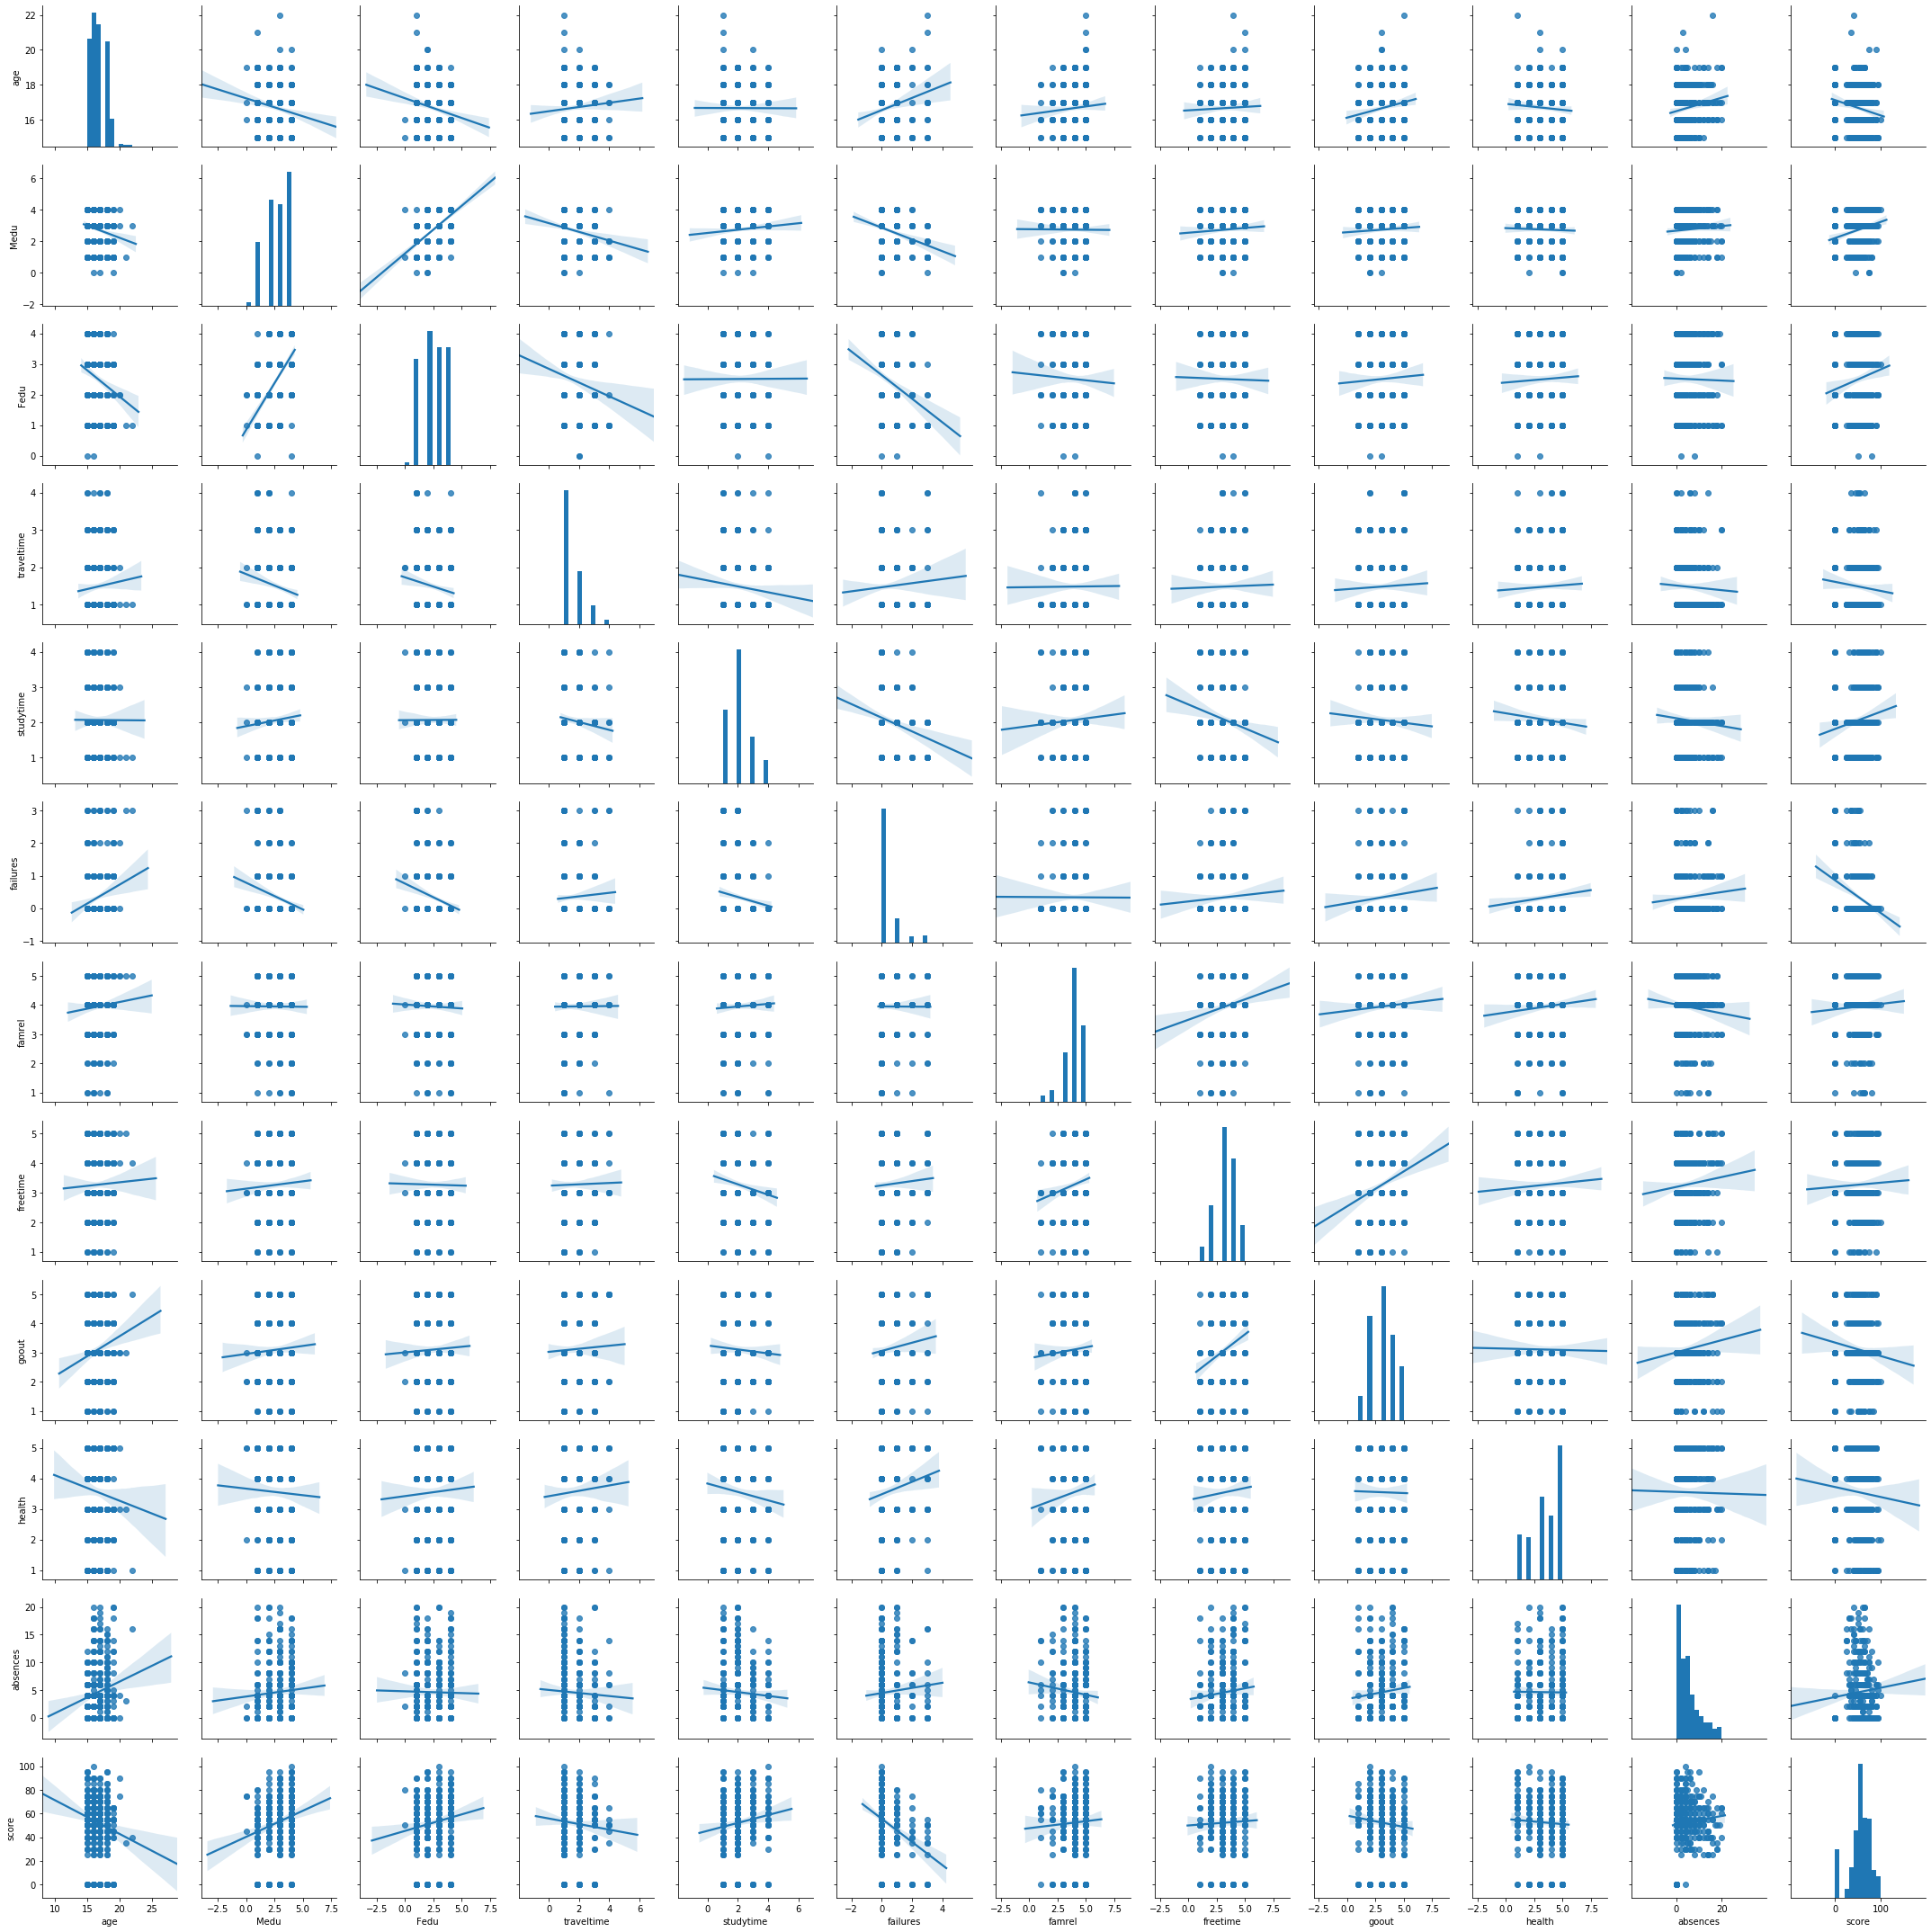

In [572]:
sns.pairplot(students, kind = 'reg')

In [573]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.178544,-0.196819,0.070006,-0.002251,0.201302,0.064215,0.030807,0.155270,-0.075874,0.148437,-0.157974
Medu,-0.178544,1.000000,0.607588,-0.184263,0.081199,-0.247669,-0.005547,0.055075,0.054203,-0.034015,0.065026,0.212342
Fedu,-0.196819,0.607588,1.000000,-0.148932,0.002404,-0.254653,-0.033029,-0.013367,0.038252,0.040322,-0.014571,0.134776
traveltime,0.070006,-0.184263,-0.148932,1.000000,-0.093933,0.054401,0.004815,0.016728,0.034371,0.046218,-0.041477,-0.075333
studytime,-0.002251,0.081199,0.002404,-0.093933,1.000000,-0.162123,0.044601,-0.154327,-0.052894,-0.085499,-0.061662,0.127001
failures,0.201302,-0.247669,-0.254653,0.054401,-0.162123,1.000000,-0.002681,0.053537,0.091937,0.106649,0.069207,-0.312124
famrel,0.064215,-0.005547,-0.033029,0.004815,0.044601,-0.002681,1.000000,0.154286,0.060395,0.089613,-0.082465,0.046715
freetime,0.030807,0.055075,-0.013367,0.016728,-0.154327,0.053537,0.154286,1.000000,0.265447,0.056078,0.081757,0.031806
goout,0.155270,0.054203,0.038252,0.034371,-0.052894,0.091937,0.060395,0.265447,1.000000,-0.011610,0.091267,-0.093536
health,-0.075874,-0.034015,0.040322,0.046218,-0.085499,0.106649,0.089613,0.056078,-0.011610,1.000000,-0.008970,-0.053314


Наиболее сильно коррелирующие (>0.2) с баллом на экзамене столбцы это:
- **Medu**
- **failures**  
Причём корреляция разнонаправленная. Чем выше у матери образование, тем выше оценка ученика. И, наоборот, чем больше неудач наблюдалось у студента, тем хуже его оценка.

Также можно выделить несолько других признаков со значение коэффициента корреляции между 0.1 и 0.2:
- **age** (отрицательная корреляция)
- **studytime** (положительная корреляция)
- **Fedu** (положительная корреляция)
- **goout** (отрицательная корреляция)

## 4. Анализ номинативных переменных

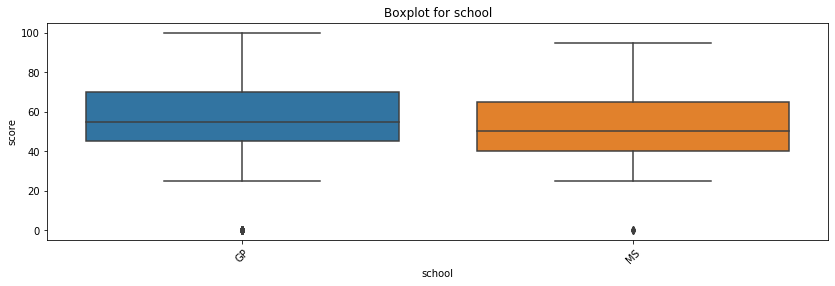

____________________________________________________________________________________________________



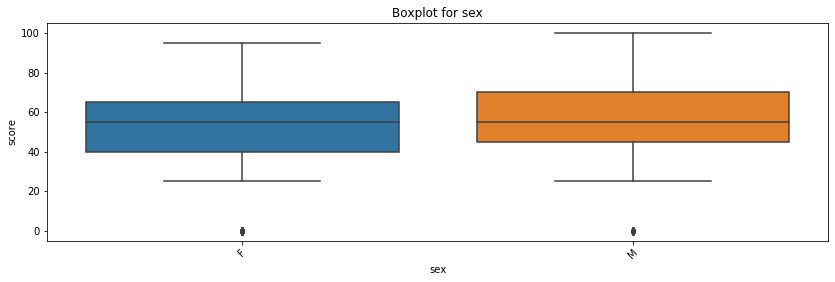

Найдены статистически значимые различия для колонки  sex
____________________________________________________________________________________________________



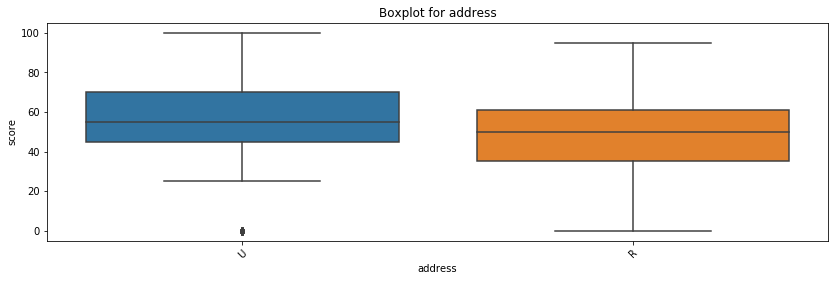

Найдены статистически значимые различия для колонки  address
____________________________________________________________________________________________________



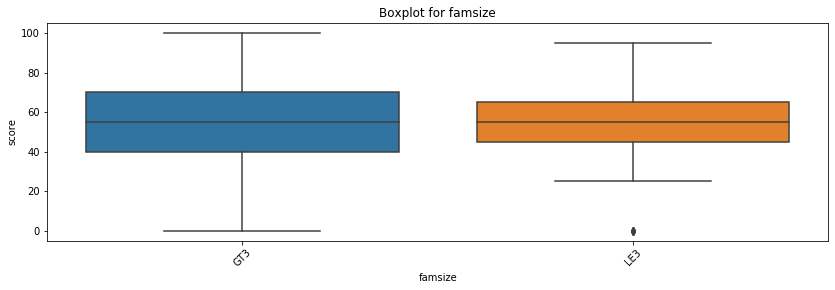

____________________________________________________________________________________________________



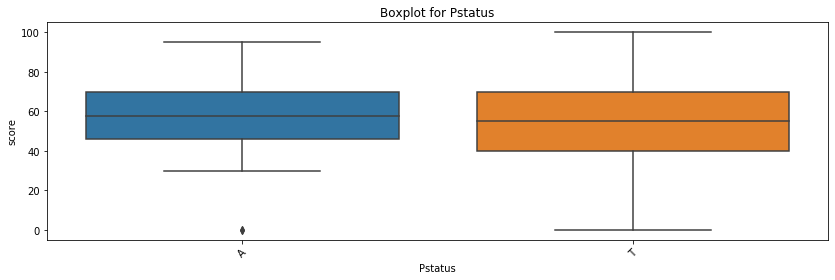

____________________________________________________________________________________________________



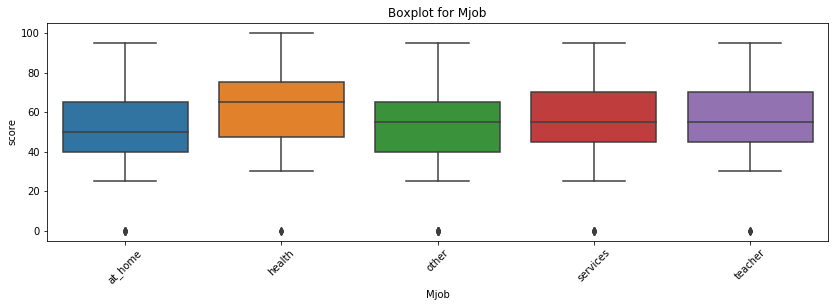

____________________________________________________________________________________________________



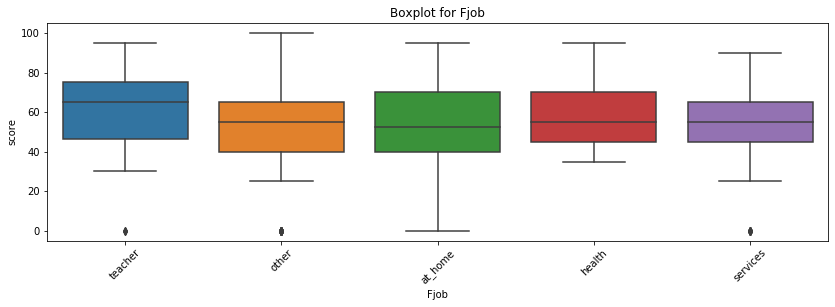

____________________________________________________________________________________________________



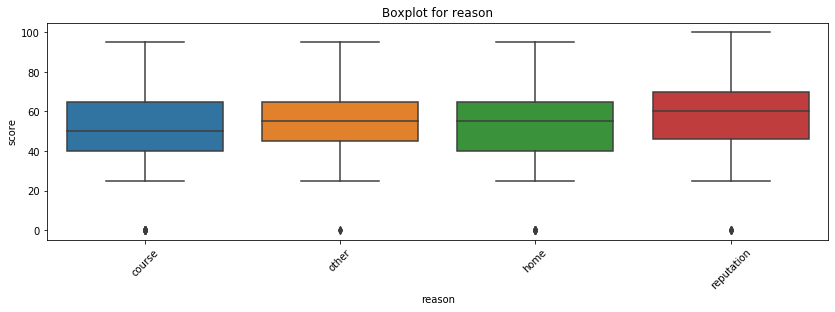

____________________________________________________________________________________________________



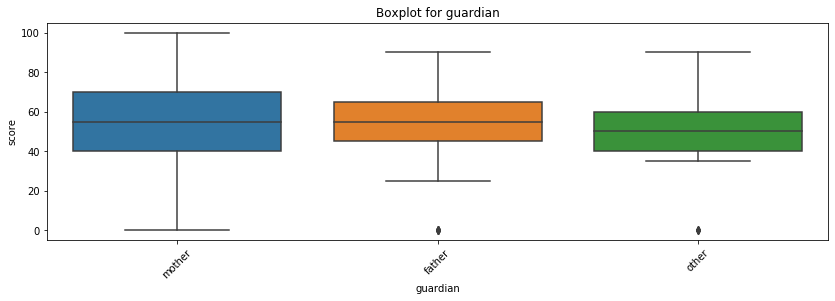

____________________________________________________________________________________________________



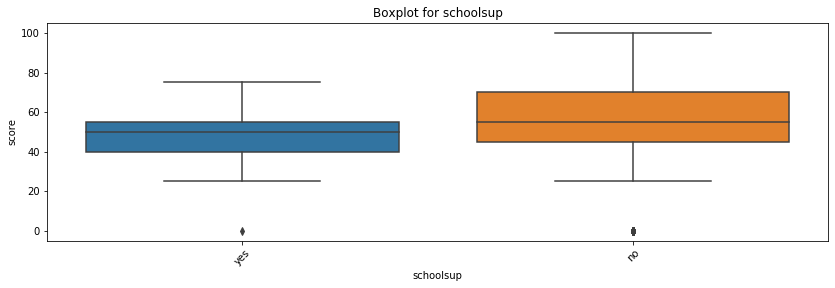

____________________________________________________________________________________________________



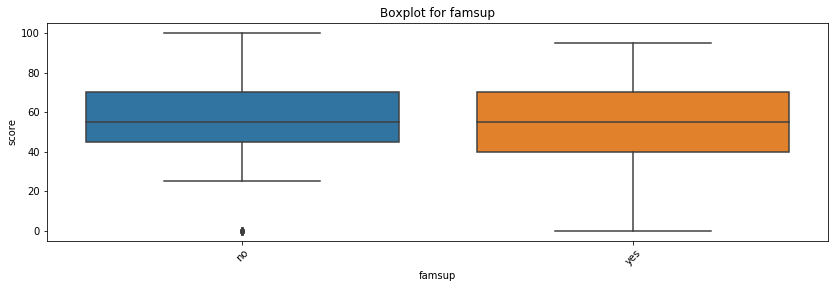

____________________________________________________________________________________________________



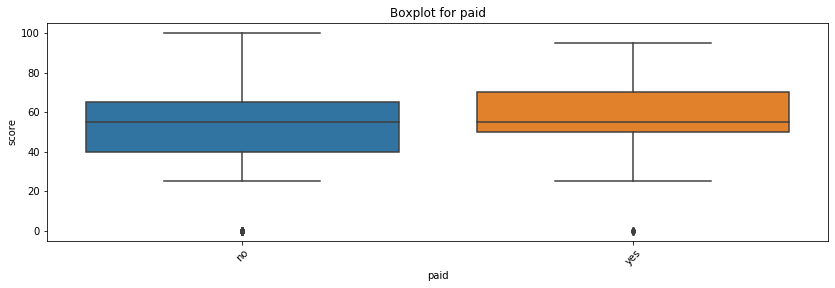

Найдены статистически значимые различия для колонки  paid
____________________________________________________________________________________________________



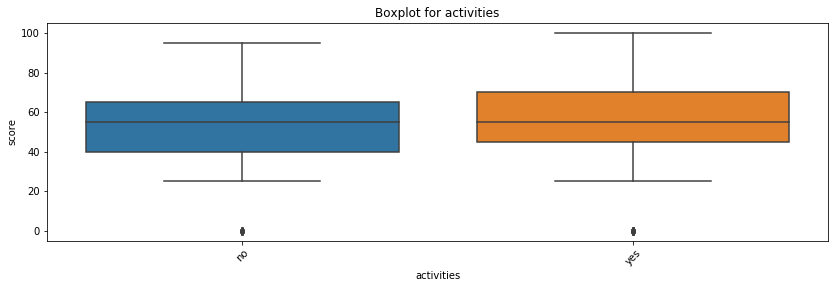

____________________________________________________________________________________________________



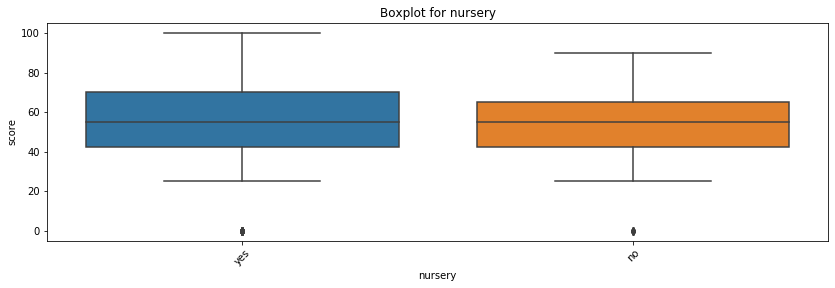

____________________________________________________________________________________________________



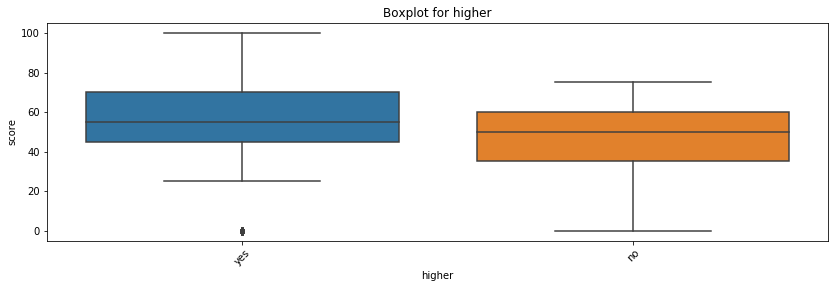

Найдены статистически значимые различия для колонки  higher
____________________________________________________________________________________________________



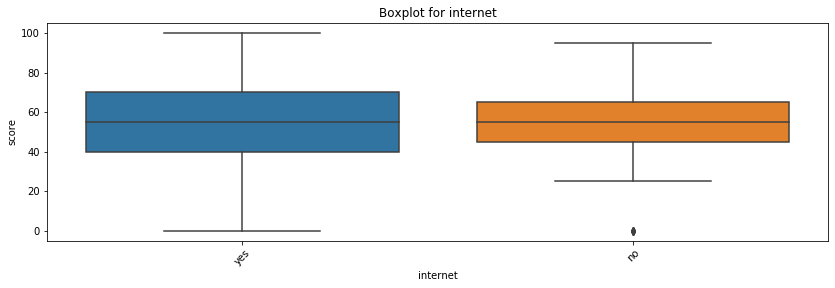

____________________________________________________________________________________________________



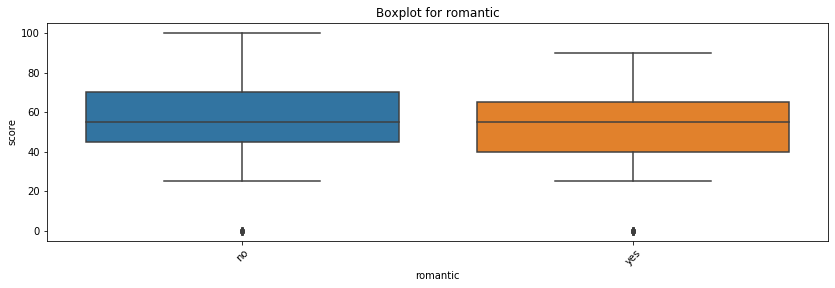

Найдены статистически значимые различия для колонки  romantic
____________________________________________________________________________________________________



In [582]:
def nominative_analysis(dataframe, column):
    if dataframe[column].dtypes == 'object':
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score', 
                    data=dataframe,
                   ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()

        cols = dataframe.loc[:, column].value_counts().index
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], 'score'], 
                            dataframe.loc[dataframe.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
                print('Найдены статистически значимые различия для колонки ', column)
                break
        print('_' * 100)
        print()
    
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    nominative_analysis(students, col)

In [584]:
def get_stat_dif(dataframe, column, main_feature):
    cols = dataframe.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], main_feature], 
                        dataframe.loc[dataframe.loc[:, column] == comb[1], main_feature]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    print(col)
    get_stat_dif(students, col, 'score')
    print('\n')

school


sex
Найдены статистически значимые различия для колонки sex


address
Найдены статистически значимые различия для колонки address


famsize


Pstatus


Mjob


Fjob


reason


guardian


schoolsup


famsup


paid
Найдены статистически значимые различия для колонки paid


activities


nursery


higher
Найдены статистически значимые различия для колонки higher


internet


romantic
Найдены статистически значимые различия для колонки romantic




По результатам анализа числовых признаков мы выяснили, что статистически значимый эффект на итоговый бал могут оказывать 'Medu', 'Fedu', 'age', 'studytime', 'failures', 'goout'.  
Анализ номинативных анализов позволил также оставить другие 5 признаков ('sex', 'address', 'paid', 'higher', 'romantic').

In [587]:
students_for_model = students.loc[:, ['Medu', 'Fedu', 'age', 'studytime', 'failures', 'goout', 
                                  'sex', 'address', 'paid', 'higher', 'romantic']]
students_for_model.head(20)

,Medu,Fedu,age,studytime,failures,goout,sex,address,paid,higher,romantic
0,4.0,4.0,18,2.0,0.0,4.0,F,U,no,yes,no
1,1.0,1.0,17,2.0,0.0,3.0,F,U,no,yes,no
2,1.0,1.0,15,2.0,3.0,2.0,F,U,yes,yes,no
3,4.0,2.0,15,3.0,0.0,2.0,F,U,yes,yes,yes
4,3.0,3.0,16,2.0,0.0,2.0,F,U,yes,yes,no
5,4.0,3.0,16,2.0,0.0,2.0,M,U,yes,yes,no
6,2.0,2.0,16,2.0,0.0,4.0,M,U,no,yes,no
7,4.0,4.0,17,2.0,0.0,4.0,F,U,no,yes,no
8,3.0,2.0,15,2.0,0.0,2.0,M,U,yes,yes,no
9,3.0,4.0,15,2.0,0.0,1.0,M,U,yes,yes,no


**В переменной students_for_model теперь хранится итоговый датасет с очищенными данными**